<a href="https://colab.research.google.com/github/wjdrnqja9/TIL/blob/main/machine_learning/01_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀분석 : Regression Analysis

## 1. 회귀분석이란?
- 회귀분석의 목적
    - 독립변수로 종속변수를 예측하는것
    - 종속변수는 수치형 데이터
- 회귀분석의 종류
    - 단순회귀 : simple regression
        - 독립변수 1개, 종속변수 1개, 1차원 수식
    - 다중회귀 : multiple regression
        - 독립변수 2개 이상, 종속변수 1개, 1차원 수식
    - 다항회귀 : polynomial regression
        - 독립변수 1개 이상, 종속변수 1개, 2차원 이상의 수식

In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'} # 레티나 설정 - 폰트 주변이 흐릿하게 보이는 것을 방지해 글씨가 좀 더 선명하게 보임

In [2]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## 2. 회귀분석의 수식

### 2.1 샘플 데이터 생성

In [3]:
datas = np.array([[1, 3], [2, 5], [3, 7]])
df = pd.DataFrame(datas, columns=list("xy"))
df

,x,y
0,1,3
1,2,5
2,3,7


### 2.2 산점도 그리기

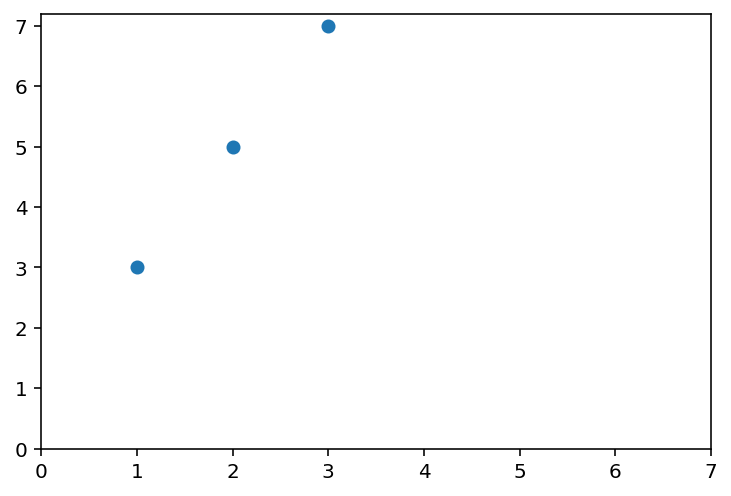

In [4]:
plt.scatter(df["x"], df["y"])
plt.xticks(range(0, 8))
plt.yticks(range(0, 8))
plt.show()

### 2.3 추세선을 구하는 방법 1 : 방정식
- 샘플 데이터를 직선 방정식으로 표현
- 일반적인 우리가 배운 수학에서는 방정식으로 해결
- $y = a + bx$ 
    - 데이터 : [1, 3], [2, 5], [3, 7]
    - 계산과정
        - $3 = a + 1b$
        - $5 = a + 2b$
        - $(3 = a + b) - (5 = a + 2b) = (-2 = -1b)$ -> $b = 2$
        - $3 = a + b (b = 2)$ -> $a = 1$
    - 추세선 : $y = 1 + 2x$ 

수식으로 값 예측하기

In [5]:
# 리스트 컴프리헨션 : 리스트 데이터를 만들때 사용
data = [1, 2, 3]
result = [num**2 for num in data if num % 2]
result

[1, 9]

In [6]:
# 추세선 함수
def pred_func(x):
    return 1 + 2 * x

# 예측값 구하기
pred_y = [pred_func(data) for data in range(0, 5)]

pred_y

[1, 3, 5, 7, 9]

추세선 그리기

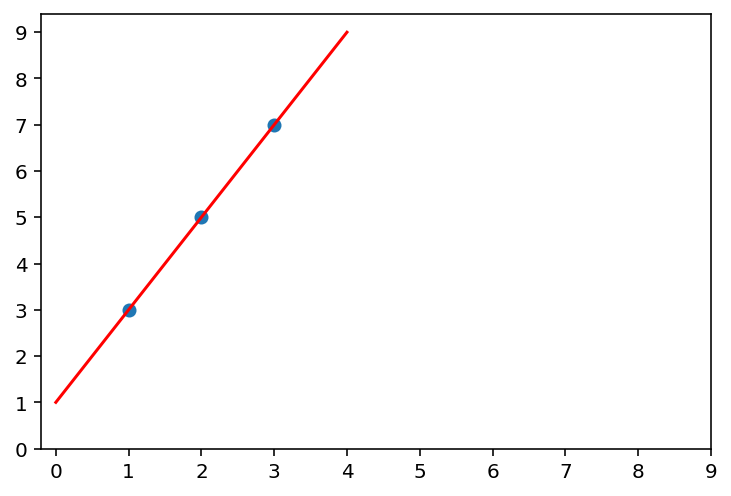

In [7]:
plt.scatter(df["x"], df["y"])
plt.plot(range(0, 5), pred_y, "r-")
plt.xticks(range(0, 10))
plt.yticks(range(0, 10))
plt.show()

### 2.4 추세선을 구하는 방법 2 : 선형대수

$$Datas : (1, 3), (2, 5)$$

$$y = a + bx$$

- 방정식

$$3 = a + b$$
$$5 = a + 2b$$

$$(3 = a + b) - (5 = a + 2b) => (2 = b)$$

$$ y = 1 + 2x $$

- 선형대수

$$Datas : (1, 3), (2, 5)$$

$$y = a \cdot 1 + bx$$

- 방정식을 선형대수로 표현

$$
\begin{bmatrix}
y_1\\
y_2\\
\end{bmatrix}
=
\begin{bmatrix}
1 \quad x_{1}\\
1 \quad x_{2}\\
\end{bmatrix}
\begin{bmatrix}
a\\
b\\
\end{bmatrix}
$$

$$y_1 = 1 \cdot a + x_1 \times b$$
$$y_2 = 1 \cdot a + x_2 \times b$$

- 데이터 적용

$$
\begin{bmatrix}
3\\
5\\
\end{bmatrix}
=
\begin{bmatrix}
1 \quad 1\\
1 \quad 2\\
\end{bmatrix}
\begin{bmatrix}
a\\
b\\
\end{bmatrix}
$$

$$3 = a + b$$
$$5 = a + 2b$$

- 역행렬을 이용해서 풀이

$$
\begin{bmatrix}
1 \quad 1\\
1 \quad 2\\
\end{bmatrix}^{-1}
\begin{bmatrix}
3\\
5\\
\end{bmatrix}
=
\begin{bmatrix}
a\\
b\\
\end{bmatrix}
$$

$$
A^{-1}=
\frac{1}{ad-bc}
\begin{bmatrix}
d \quad -b\\
-c\quad a\\
\end{bmatrix}
$$

$$
\begin{bmatrix}
2 \quad -1\\
-1 \quad 1\\
\end{bmatrix}
\begin{bmatrix}
3\\
5\\
\end{bmatrix}
=
\begin{bmatrix}
1\\
2\\
\end{bmatrix}
$$

$$ y = a + bx => y = 1 + 2x $$

### 2.5 모든 데이터가 직선위에 있지 않는경우 : 최소제곱법
- 추세선을 구하는 방법 1은 항상 데이터가 추세선위에 직선으로 위치할때만 정확히 구할수 있습니다.
- 하지만 모든 데이터는 위에서와 같이 항상 직선의 추세선 위에만 존재하지 않습니다.

#### 추세선의 수식
- $\hat{y} = a + bx$
    - $\hat{y}$ : 추세선 : 종속변수의 예측값
    - $x$ : 독립변수
    - $a$ : y절편(constant)
    - $b$ : 기울기(slope)
        - $\frac{\Delta{y}}{\Delta{x}}$ : y의 증가량 / x의 증가량
    - $a, b$ : 회귀계수

샘플 데이터 및 산포도

[array([1, 2]), array([2, 8]), array([3, 5])]


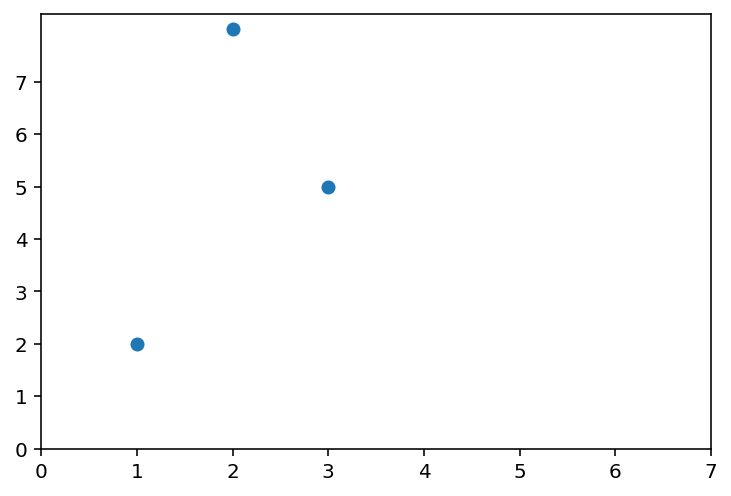

In [8]:
# 샘플 데이터 생성
datas = np.array([[1, 2], [2, 8], [3, 5]])
print(list(datas))

# 데이터 프레임으로 만들기
df = pd.DataFrame(datas, columns=list("xy"))

# 그래프 그리기
plt.scatter(df["x"], df["y"])
plt.xticks(range(0, 8))
plt.yticks(range(0, 8))
plt.show()

#### 실제 점들의 수식
- $y_i = a + bx_i + \varepsilon$
    - $y$ : 승점 : 종속변수의 실제값
    - $x$ : 득점 : 독립변수
    - $\varepsilon$ : 오차 : 추세선과 실제값의 차이
    - $i$ : 개별 값

In [9]:
# mac, ubuntu ,
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


const    2.0
x        1.5
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


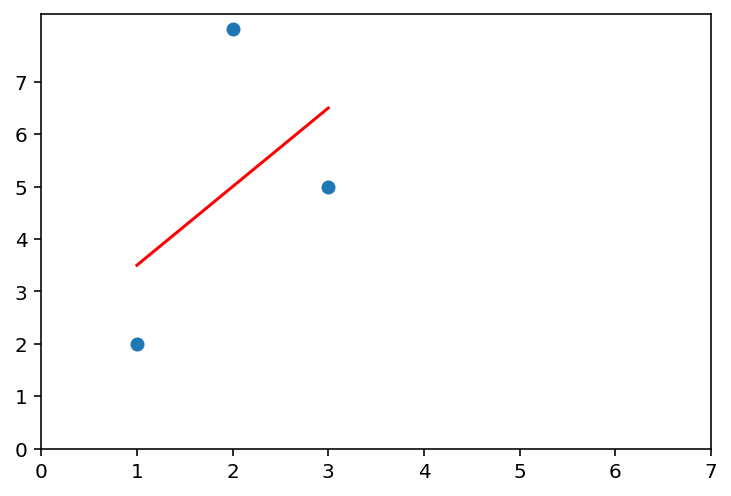

In [10]:
# 추세선 구하는 코드 : 추후에 학습
import statsmodels.api as sm

# 모델 학습
feature = sm.add_constant(df["x"], has_constant='add')
model = sm.OLS(df["y"], feature)
fitted_model = model.fit()
print(fitted_model.params)

# 예측값 구하기
pred_datas = np.dot(feature, fitted_model.params)

# 그래프 그리기
plt.scatter(df["x"], df["y"])
plt.plot(df["x"], pred_datas, "r-")
plt.xticks(range(0, 8))
plt.yticks(range(0, 8))
plt.show()

#### 최소제곱법 : Least Square Method

- 최적의 추세선을 구하기 위한 방법
    - 추세선과 모든 데이터의 오차가 적은 추세선이 가장 좋은 추세선 입니다.

#### 오차 수식

- 오차($e_i$) = 실제값($y_i$) - 예측값($\hat{y_i}$)
- 가장 좋은 추세선 : $e_i$가 가장 작은 추세선

$$e_i = y_i - \hat{y_i}$$


#### 모든 데이터의 오차를 구하는 수식

- 제곱을 해주는 이유
    - $e_i$ 는 음수도 있고 양수도 있습니다. 
    - 제곱을 해주지 않으면 음수와 양수가 더해져서 오차가 커도 다 더해주면 0에 가까운 값이 나올수 있습니다.
    - 절대값으로 계산을하면 최소 오차를 구할때 미분이 필요한데 미분의 수식이 복잡해집니다.
- 모든 오차의 제곱합($\sum_{i=1}^n e_i^2$)을 가장 작게 만드는 $a$와 $b$값이 최적의 추세선 수식이 됩니다.
        
        
$$\sum_{i=1}^n e_i^2 = \sum_{i=1}^{n}(y_i - \hat{y_i})^2$$


$$\hat{y} = a + bx$$


$$ \sum_{i=1}^n e_i^2 = \sum_{i=1}^n(y_i - a - bx_i)^2$$

#### 오차의 제곱합이 가장 작아지는 a와 b를 구하는 방법 1
- 특정 범위에서 $a$와 $b$를 증가시켜가면서 최적의 $a$와 $b$를 찾습니다.

In [11]:
# 모든 오차의 제곱합 구하는 함수
def error_func(df, a=0, b=1):
    e = 0
    for idx, data in df.iterrows():
        e += (data.y - a - b * data.x) ** 2
    return e

In [12]:
batch_size = 0.5 # batch_size, epoch

a_datas = np.arange(0, 3, batch_size)
b_datas = np.arange(0, 3, batch_size)

error_datas = []

for a_data in a_datas:
    for b_data in b_datas:
        error_datas.append({
            "a_data": a_data,
            "b_data": b_data,
            "error": error_func(df, a_data, b_data),
        })

error_df = pd.DataFrame(error_datas)
error_df

,a_data,b_data,error
0,0.0,0.0,93.00
1,0.0,0.5,63.50
2,0.0,1.0,41.00
3,0.0,1.5,25.50
4,0.0,2.0,17.00
5,0.0,2.5,15.50
6,0.5,0.0,78.75
7,0.5,0.5,52.25
8,0.5,1.0,32.75
9,0.5,1.5,20.25


In [13]:
# 에러의 최소값
error_df[error_df.error == np.min(error_df.error)]

,a_data,b_data,error
27,2.0,1.5,13.5


#### 오차의 제곱합이 가장 작아지는 a와 b를 구하는 방법 2
- 경사하강법(gradient descent)
  - $a$와 $b$의 미분값으로 기울기 구하기
    - 기울기가 음수이면 값을 증가(오른쪽으로 이동)
    - 기울기가 양수이면 값을 감소(왼쪽으로 이동)

- 경사하강법의 이해 1
  - 추세선의 수식을 $\hat{y} = bx$ 라고 가정 : 경사하강법의 이해를 돕기위해 a를 제거
  - b값에 따른 오차
    $$ \sum_{i=1}^n e_i^2 = \sum_{i=1}^n(y_i - bx_i)^2$$

In [14]:
b_datas = np.arange(0, 5, 0.5)
# b_datas = np.arange(0, 5, 0.001)
# print(b_datas)

# 에러 함수
def error_func(df, b=1):
    e = 0
    for idx, data in df.iterrows():
        e += (data.y - b * data.x) ** 2
    return e

error_datas = []

# 0 ~ 4.5 까지 에러를 출력
for b_data in b_datas:
    
    e = error_func(df, b_data)
    
    error_datas.append({
        "b_data":b_data,
        "error": e,
    })
    
# b 값이 2.5일때 가장 오차제곱합이 가장 작다.
# 최적의 추세선 -> y = 2.5x
error_df = pd.DataFrame(error_datas)
error_df

,b_data,error
0,0.0,93.0
1,0.5,63.5
2,1.0,41.0
3,1.5,25.5
4,2.0,17.0
5,2.5,15.5
6,3.0,21.0
7,3.5,33.5
8,4.0,53.0
9,4.5,79.5


In [15]:
error_df[error_df.error == np.min(error_df.error)]

,b_data,error
5,2.5,15.5


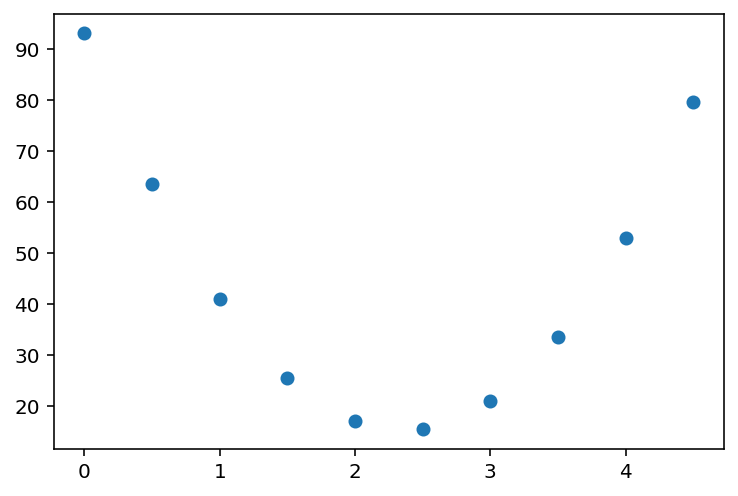

In [16]:
# b값에 대한 error 값의 그래프
# 그래프에서 기울기가 가장 작아지는 값이 최적의 b값이 된다.
plt.scatter(error_df.b_data, error_df.error)
plt.show()

- 경사하강법의 이해 2
    
- $\hat{y} = bx$ : 이해를 돕기위해 $a$는 제거
    - $b$를 편미분 
$$ \sum_{i=1}^n e_i^2 = \sum_{i=1}^n(y_i - bx_i)^2$$
$$ \frac{\partial{L}}{\partial{b}} = -2 \sum_{i=1}^{n}(y_i - bx_i)x_i  $$
- 위와 같이 일정한 비율로 찾으면 찾는데 오래 걸립니다.
- b값의 이동 규칙
    - 기울기가 음수이면 값을 증가(오른쪽으로 이동)
    - 기울기가 양수이면 값을 증가(왼쪽으로 이동)
    - $ b:=b-{batch size} \centerdot \frac{\partial{L}}{\partial{b}}$

In [17]:
# b의 초기값
b = 50

# 최적값을 찾기위한 실행 횟수
# epoch가 낮으면 정확한 값을 찾기 어려움
epoch = 50

# 한번에 이동하는 크기제어
batch_size = 0.01

log_datas = []

#### 기울기 구하는 함수
$ \frac{\partial{L}}{\partial{b}} = -2 \sum_{i=1}^{n}(y_i - bx_i)x_i  $

In [18]:
# 기울기 구하는 함수
def slope_func(df, b):
    slope = 0
    for idx, data in df.iterrows():
        slope += -2 * (data.y - b * data.x) * data.x
    return round(slope, 2)

#### b값의 이동 규칙
- 기울기가 음수이면 값을 증가(오른쪽으로 이동)
- 기울기가 양수이면 값을 증가(왼쪽으로 이동)
- $ b:=b-{batch size} \centerdot \frac{\partial{L}}{\partial{b}}$

In [19]:
# b 값의 이동규칙을 이용하여 최적의 b구하기
for _ in range(epoch):
    
    # b 값에 대한 기울기 구하기
    slope = slope_func(df, b)
    
    # print(np.round(b, 2), slope)
    
    # 기울기가 0이면 반복문 빠져나가기
    if slope == 0:
        break
    
    # 기울기가 0 미만이면 b값이 증가 (slope가 음수이므로 b 값이 증가)
    # 기울기가 0 초과이면 b값이 증가 (slope가 양수이므로 b 값이 감소)
    b -= batch_size * slope
    b = np.round(b, 5)
    
    # 에러 구하기
    e = error_func(df, b)
    
    # 데이터 저장
    log_datas.append({
        "b": np.round(b, 2),
        "e": e,
        "slope": slope,
    })

log_df = pd.DataFrame(log_datas)
log_df.head(2)

,b,e,slope
0,36.66,16488.818400,1334.00
1,27.06,8555.130659,960.48


In [20]:
len(log_df), b # 초기값이 찾으려고 하는 값과 차이가 클수록 b의 최적값을 찾는데 오래걸림

(38, 2.3573)

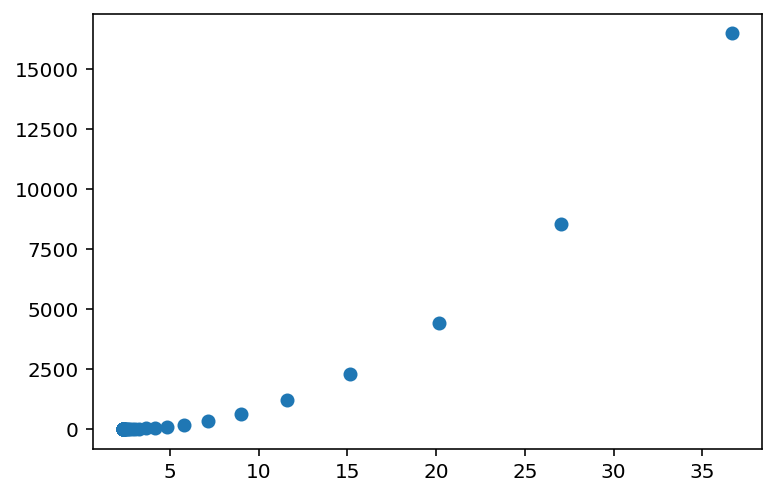

In [21]:
# 최적의 b를 찾기위한 b값과 e값의 그래프
# 최적의 b에 다가갈수록 미분값(기울기)이 작아져서 이동폭을 줄여가며 최적의 b값에 다가감
plt.scatter(log_df.b, log_df.e)
plt.show()

- $a$를 제거하지 않은 수식과 규칙은 아래와 같습니다.
    - $\hat{y} = a + bx$
        - $a$와 $b$를 편미분

    $$ \sum_{i=1}^n e_i^2 = \sum_{i=1}^n(y_i - a - bx_i)^2$$

    $$ \frac{\partial{L}}{\partial{a}} = -2 \sum_{i=1}^{n}(y_i - a - bx_i)  $$

    $$ \frac{\partial{L}}{\partial{b}} = -2 \sum_{i=1}^{n}(y_i - a - bx_i)x_i  $$

    - $a$, $b$값을 변경하면서 가장 오차가 작은 $a$, $b$값을 찾음
        - 기울기가 음수이면 값을 증가(오른쪽으로 이동)
        - 기울기가 양수이면 값을 증가(왼쪽으로 이동)
        - 이동 거리
        - $ b:=b-{batch size} \centerdot \frac{\partial{L}}{\partial{b}}$
        - $ a:=a-{batch size} \centerdot \frac{\partial{L}}{\partial{a}}$

### OLS(Ordinary Least Square)
    - 최소 제곱법으로 구해진 추세선은 평균을 지납니다.
    - 추세선이 평균으로의 회귀라고 해서 회귀 분석이라고 합니다.

#### 정리
- 단순 선형 회귀 분석은 하나의 x 데이터로 y 데이터를 예측하기 위해 최적의 추세선 수식을 구함
- x 데이터로 y 데이터를 예측

$$y = a + bx + e$$

- 가장 작은 오차($e$)를 갖는 회귀계수인 a와 b를 구하는것이 목적
- 수학에서의 방정식을 컴퓨터에서는 선형대수로 계산
- 최소제곱법 : 가장 오차가 작은 추세선을 구하기 위한 방법
- 경사하강법 : 효율적으로 회귀계수를 구하기 위한 방법